# Preparing basic knowledge for Classification

The code below is using Python with the Pandas and Scikit-learn libraries to create a word matrix from a list of strings.

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


#Downloading data

Load the dataset:

In [14]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


# Assignment 2

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
The accuracy of the model is: 0.9644549763033176


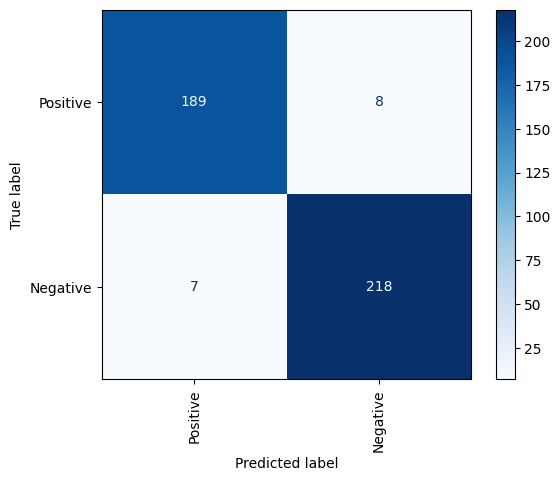

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


#HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#TfidfVectorizer
#vectorizer = TfidfVectorizer(
#   min_df=20,
#    norm='l2',
 #   smooth_idf=True,
  #  use_idf=True,
   # ngram_range=(1, 1),
    #stop_words='english'
    #)

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)



#RF
#model = RandomForestClassifier(random_state=0)
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

#XGBoost
model =  XGBClassifier()
param_grid = {
     'learning_rate': [0.01, 0.1, 0.2],
   'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5] }


#(5)SVM
#model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
#param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

In [16]:
# Here you change the reviews
text = 'Public transportation is great and easy to use'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: negative
